## CLUSTERING 

##    Importing libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

## loading the dataset

In [14]:

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
x = df.iloc[:,[0,1,2,3]].values

In [16]:
from sklearn.cluster import KMeans
wcss = []

In [17]:
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [18]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.569688528138535,
 30.42725483829896,
 28.042265254353495]

## Data visualization

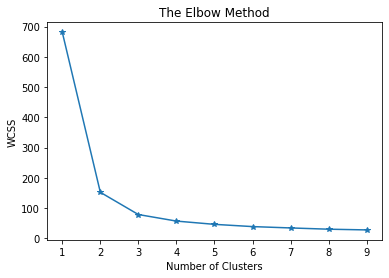

In [19]:
plt.plot(range(1,10), wcss, marker='*')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Training model

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [21]:

df["Clusters"]=kmeans.labels_
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Result clusters scatterplot

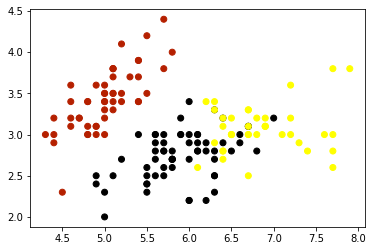

In [22]:

plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"],c=df["Clusters"],cmap='gnuplot');